In [1]:
# # Download + Unpacking test-clean of librispeech
# import shutil
# from speechbrain.utils.data_utils import download_file

# MINILIBRI_TEST_URL = "https://www.openslr.org/resources/12/test-clean.tar.gz"
# download_file(MINILIBRI_TEST_URL, 'test-clean.tar.gz')
# shutil.unpack_archive( 'test-clean.tar.gz', '.')

In [2]:
# Let's decode a single sentence:
from speechbrain.pretrained import EncoderDecoderASR
audio_1 = "LibriSpeech/test-clean/1089/134686/1089-134686-0030.flac"
model = "asr-crdnn-rnnlm-librispeech" # asr-crdnn-transformerlm-librispeech, asr-transformer-transformerlm-librispeech

# Uncomment for using another pre-trained model
asr_model = EncoderDecoderASR.from_hparams(
    source=f"speechbrain/{model}", 
    savedir=f"pretrained_models/{model}", 
    # run_opts={"device":"cuda"}, # inference on GPU
)
asr_model.transcribe_file(audio_1)

'BEWARE OF MAKING THAT MISTAKE'

In [6]:
import torch
waveform = asr_model.load_audio(audio_1)
# Fake a batch
batch = waveform.unsqueeze(0)
rel_length = torch.tensor([1.0])
predicted_words, predicted_tokens = asr_model.transcribe_batch(batch, rel_length)

In [16]:
preds1 = 'BEWARE OF MAKING THAT MISTAKE'
preds2 = 'GIVE NOT SO EARNEST A MIND TO THESE MUMMERIES CHILD'

In [17]:
from speechbrain.utils.metric_stats import ErrorRateStats
from evaluate import load

wer = load('wer')
wer_score = wer.compute(predictions=[preds1, preds2], references=[preds1, preds2])
print(wer_score)

0.0


In [39]:
pf = "LibriSpeech/test-clean/61/70968/61-70968.preds.txt"
lf = "LibriSpeech/test-clean/61/70968/61-70968.trans.txt"
f1 = open(pf, "r")
f2 = open(lf, "r")

In [40]:
# for pred, label in zip(f1, f2):
#     print(pred, label)
[' '.join(line.split()[1:]) for line in f1.read().splitlines()]

['HE BEGAN A CONFUSED COMPLAINT AGAINST THE WIZARD WHO HAD VANISHED BEHIND THE CURTAIN ON THE LEFT',
 'GIVE NOT SO EARNEST A MIND TO THESE MUMMERIES CHILD',
 'A GOLDEN FORTUNE AND A HAPPY LIFE',
 'HE WAS LIKE UNTO MY FATHER IN A WAY AND YET WAS NOT MY FATHER',
 'ALSO THERE WAS A STRIPLING PAGE WHO TURNED INTO A MAID',
 'THIS WAS SO SWEET A LADY SIR AND IN SOME MANNER I DO THINK SHE DIED',
 'BUT THEN THE PICTURE WAS GONE AS QUICKLY AS IT CAME',
 'SISTER NELL DO YOU HEAR THESE MARVELS',
 'TAKE YOUR PLACE AND LET US SEE WHAT THE CRYSTAL CAN SHOW TO YOU',
 'LIKE AS NOT YOUNG MASTER THOUGH I AM AN OLD MAN',
 'FORTHWITH ALL RAN TO THE OPENING OF THE TENT TO SEE WHAT MIGHT BE AMISS BUT MASTER WILL WHO PEEPED OUT FIRST NEEDED NO MORE THAN ONE GLANCE',
 'HE GAVE WAY TO THE OTHERS VERY READILY AND RETREATED UNPERCEIVED BY THE SQUIRE AND MISTRESS FITZOOTH TO THE REAR OF THE TENT',
 'CRIES OF A KNOTTINGHAM A KNOTTINGHAM',
 'BEFORE THEM FLED THE STROLLER AND HIS THREE SONS CAPLESS AND TERRIFIED',
 

In [8]:
import re
f = open("LibriSpeech-asr-crdnn-rnnlm-librispeech-energy.log", "r")
unit = "mW"
inss, avgs = [], []
for line in f:
    r = re.compile('VDD_GPU_SOC (.+?)([ \.]|$)')
    patterns = re.findall(r, line)
    if not patterns:
        continue
    GPU_pair = patterns[0][0]
    ins, avg = GPU_pair.split('/')
    ins = int(ins.rstrip(unit))
    inss.append(ins)
    avg = int(avg.rstrip(unit))
    avgs.append(avg)

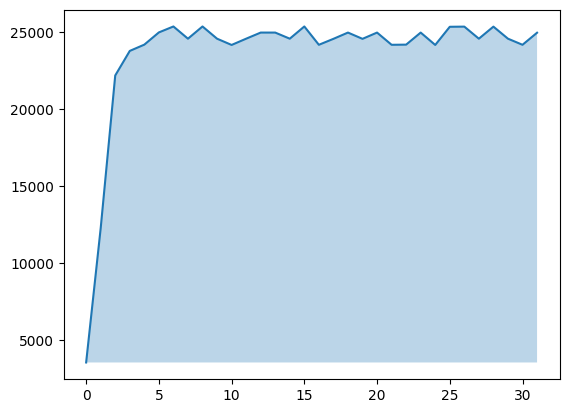

In [83]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


xx = np.arange(len(inss))
yy = np.array(inss)
plt.plot(xx, yy)
plt.fill_between(xx, yy, y2 = min(yy), alpha=0.3,)

plt.show()